In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_targer) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

2023-01-31 21:25:14.605282: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-31 21:25:14.605971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)  # verbose 훈련과정 출력 0안함, 2진행막대 빼고 출력

2023-01-31 21:26:31.601640: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-31 21:26:31.770222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


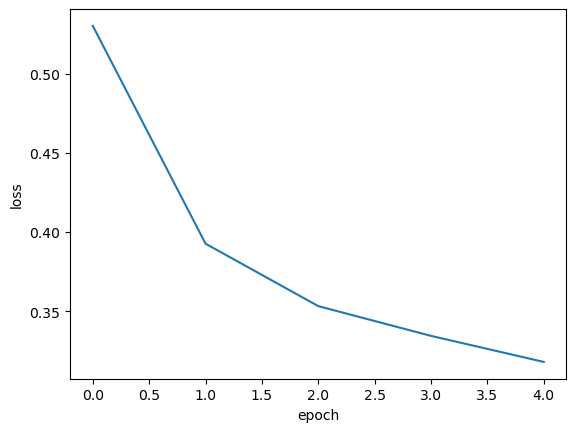

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

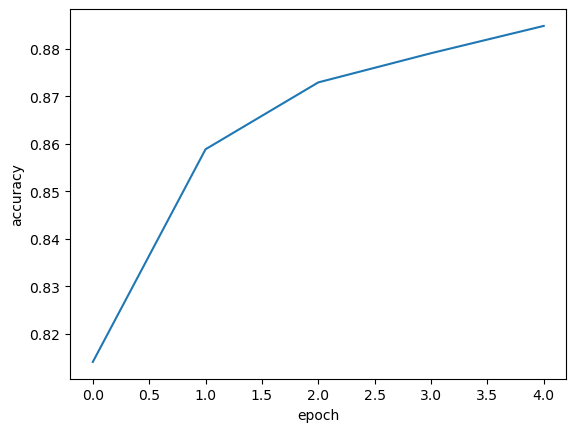

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Epoch 1/20


2023-01-31 21:34:15.683025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 - 6s - loss: 0.5302 - accuracy: 0.8136 - 6s/epoch - 4ms/step
Epoch 2/20
1500/1500 - 6s - loss: 0.3930 - accuracy: 0.8600 - 6s/epoch - 4ms/step
Epoch 3/20
1500/1500 - 6s - loss: 0.3559 - accuracy: 0.8719 - 6s/epoch - 4ms/step
Epoch 4/20
1500/1500 - 6s - loss: 0.3334 - accuracy: 0.8805 - 6s/epoch - 4ms/step
Epoch 5/20
1500/1500 - 6s - loss: 0.3191 - accuracy: 0.8863 - 6s/epoch - 4ms/step
Epoch 6/20
1500/1500 - 6s - loss: 0.3072 - accuracy: 0.8899 - 6s/epoch - 4ms/step
Epoch 7/20
1500/1500 - 6s - loss: 0.2983 - accuracy: 0.8951 - 6s/epoch - 4ms/step
Epoch 8/20
1500/1500 - 6s - loss: 0.2905 - accuracy: 0.8971 - 6s/epoch - 4ms/step
Epoch 9/20
1500/1500 - 6s - loss: 0.2843 - accuracy: 0.9004 - 6s/epoch - 4ms/step
Epoch 10/20
1500/1500 - 6s - loss: 0.2762 - accuracy: 0.9026 - 6s/epoch - 4ms/step
Epoch 11/20
1500/1500 - 6s - loss: 0.2706 - accuracy: 0.9060 - 6s/epoch - 4ms/step
Epoch 12/20
1500/1500 - 6s - loss: 0.2674 - accuracy: 0.9064 - 6s/epoch - 4ms/step
Epoch 13/20
1500/1500 - 

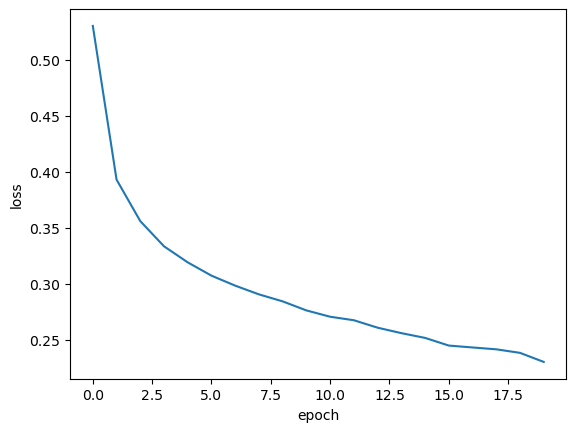

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=2)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

2023-01-31 21:39:19.100428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-31 21:39:25.571800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


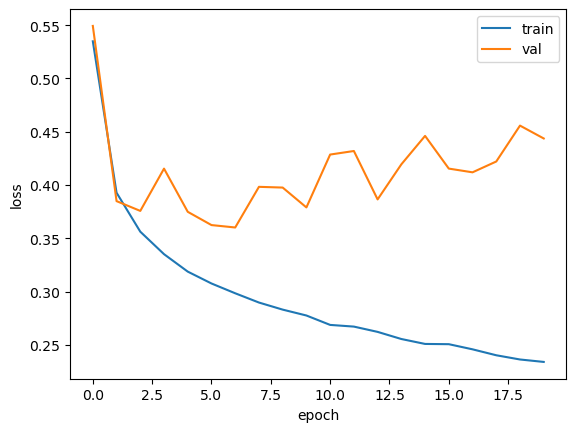

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

2023-01-31 21:44:45.456166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-31 21:44:50.738307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


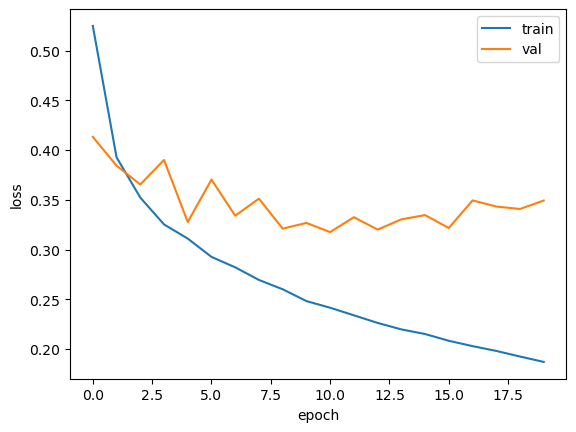

In [13]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2023-01-31 23:05:15.466387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-31 23:05:21.564449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


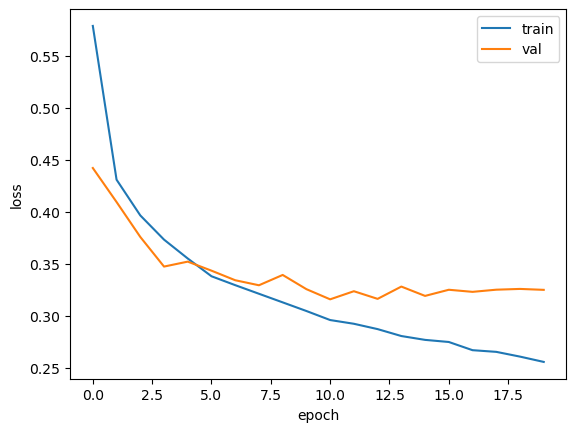

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

2023-01-31 23:11:08.504689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-31 23:11:15.219052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [17]:
model.save_weights('model-weights.h5')

In [18]:
model.save('model-whole.h5')

In [19]:
!ls -al *.h5

-rw-r--r--  1 leejuhyung  staff  333448 Jan 31 23:14 model-weights.h5
-rw-r--r--  1 leejuhyung  staff  982664 Jan 31 23:14 model-whole.h5


In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [21]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))
# axis=-1은 배열의 마지막 차원을 따라 최댓값을 골라줌
# 0은 행을 따라 1은 열을 따라

127/375 [=========>....................] - ETA: 0s

2023-02-01 01:08:02.681627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 1ms/step
0.8750833333333333


In [23]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

 38/375 [==>...........................] - ETA: 1s - loss: 0.3385 - accuracy: 0.8808

2023-02-01 01:13:50.757013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 4ms/step - loss: 0.3465 - accuracy: 0.8751


[0.3464736342430115, 0.875083327293396]

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

2023-02-01 01:18:52.360624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-01 01:18:58.096265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [26]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

 27/375 [=>............................] - ETA: 1s - loss: 0.3024 - accuracy: 0.8912

2023-02-01 01:32:19.480324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 4ms/step - loss: 0.3147 - accuracy: 0.8859


[0.31465837359428406, 0.8859166502952576]

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# patience는 결과가 맘에 들지 않아도 참을 횟수 즉,2번 연속 검증 점수가 향상 되지 않으면 중단
# restore_best_weights 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

2023-02-01 01:36:13.817989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-01 01:36:19.611135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [28]:
print(early_stopping_cb.stopped_epoch)
# 에포크가 0부터 시작하므로 11번째에서 중지, patience가 2이므로 9번쨰가 최상의 모델일 것임

10


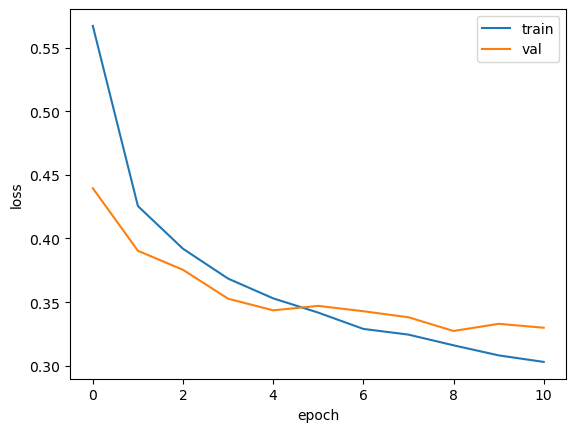

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model.evaluate(val_scaled, val_target)
# ? 저장된 거 불러오지 않아도 되는건가?

 40/375 [==>...........................] - ETA: 1s - loss: 0.3428 - accuracy: 0.8703

2023-02-01 01:44:12.931670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 4ms/step - loss: 0.3274 - accuracy: 0.8787


[0.32735079526901245, 0.8786666393280029]